In [25]:
# Importing required libraries

# Library for data cleaning and data manipulation
import pandas as pd
import numpy as np

# Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

# Library for normality test
import scipy.stats as stats

# Library for text analysis
import re
from collections import Counter
import string

# Other libraries
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv("Airbnb Listings Bangkok_clean.csv")

### **3. Optimal Minimum Nights Policy Analysis**

The Optimal Minimum Nights Policy Analysis explores the relationship between minimum stay requirements and key performance metrics such as average price, number of reviews, and occupancy rates. Listings are grouped based on their minimum nights policy to assess how different stay requirements impact guest engagement and revenue.

This analysis provides insights into how listings with varying minimum night policies perform, helping hosts identify the most effective strategies for setting stay requirements. The findings can inform decisions on how to balance short-term bookings, which may increase occupancy, against longer minimum stays, which could potentially lead to higher revenue per booking.

In [28]:
# Grouping Minimum Nights into bins
bins = [1, 3, 7, 14, 30, 60, 90, 120, df['minimum_nights'].max()]
labels = ["1-3 nights", "4-7 nights", "8-14 nights", "15-30 nights", "31-60 nights", "61-90 nights", "91-120 nights", "120+ nights"]
df["min_nights_group"] = pd.cut(df["minimum_nights"], bins=bins, labels=labels, right=False)

# Analyzing the impact of grouped minimum nights on price, reviews, and availability
min_nights_analysis = df.groupby("min_nights_group").agg(
    avg_price=("price", "mean"),
    total_reviews=("number_of_reviews", "sum"),
    avg_availability=("availability_365", "mean")
).reset_index()

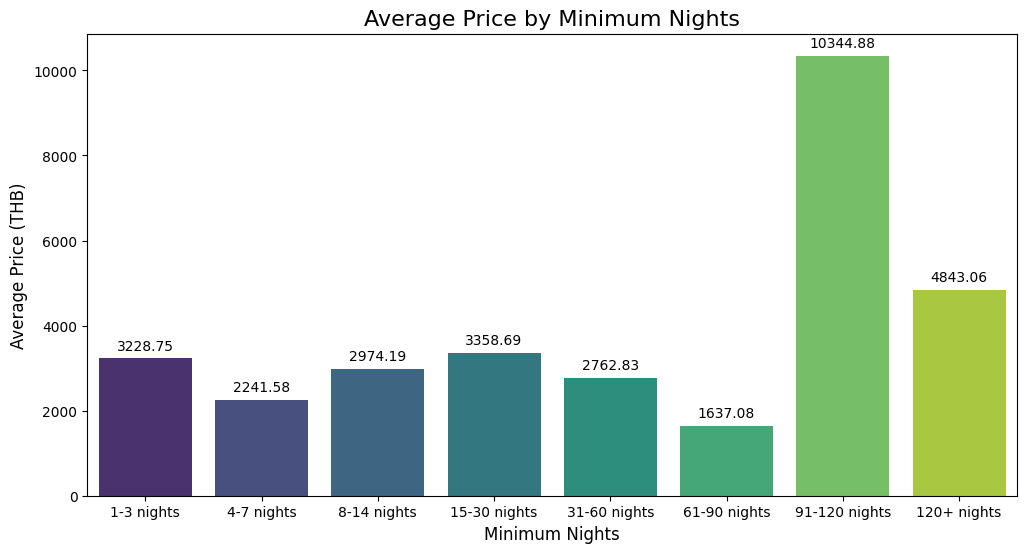

In [34]:
# Average Price by Minimum Nights
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=min_nights_analysis, x="min_nights_group", y="avg_price", palette="viridis")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title("Average Price by Minimum Nights", fontsize=16)
plt.xlabel("Minimum Nights", fontsize=12)
plt.ylabel("Average Price (THB)", fontsize=12)
plt.show()


The graph shows the relationship between the average price of listings and the minimum nights required. Listings with higher minimum night requirements generally command higher prices. This suggests that properties with longer minimum stays can be positioned as premium offerings, appealing to guests looking for extended stays. However, excessively high minimum stays may limit the pool of potential guests, so a balance must be struck.

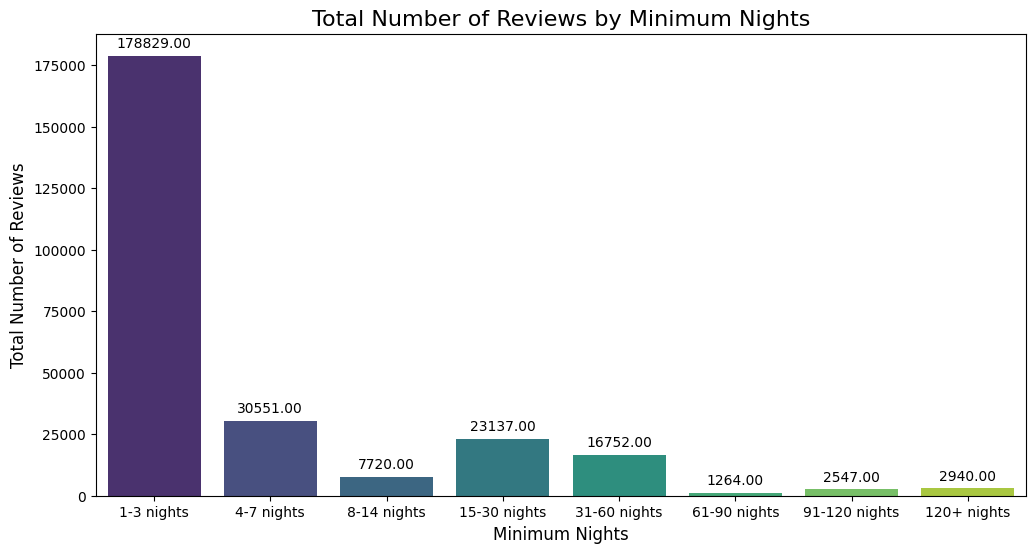

In [35]:
# Total Number of Reviews by Minimum Nights
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=min_nights_analysis, x="min_nights_group", y="total_reviews", palette="viridis")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title("Total Number of Reviews by Minimum Nights", fontsize=16)
plt.xlabel("Minimum Nights", fontsize=12)
plt.ylabel("Total Number of Reviews", fontsize=12)
plt.show()

The graph shows that the highest number of reviews is associated with listings that have a minimum stay of 1-3 nights, indicating that shorter stays are the most popular and likely have the highest occupancy rates. As the minimum night requirement increases, the number of reviews drops sharply, suggesting that longer minimum stays result in lower occupancy and fewer guest turnovers.

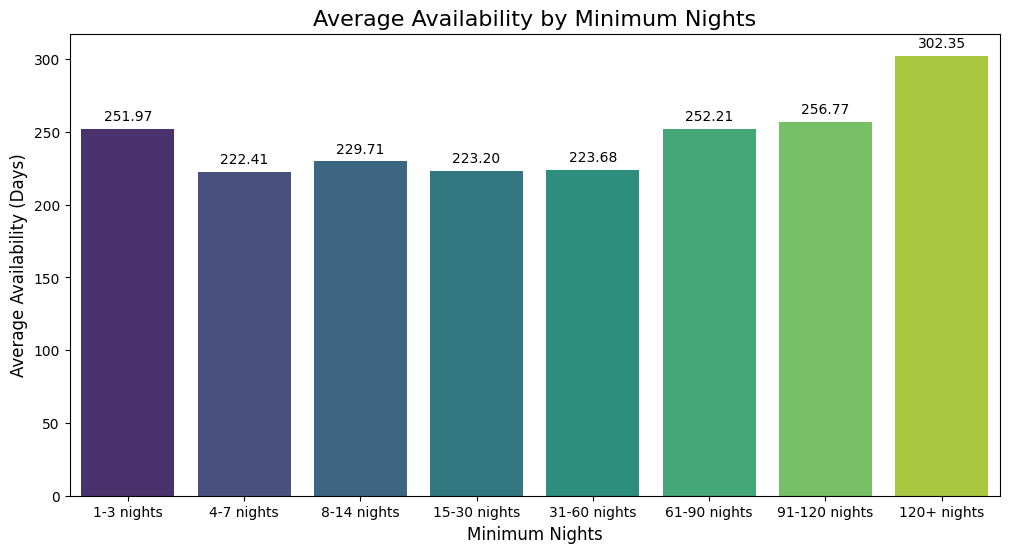

In [36]:
# Average Availability by Minimum Nights
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=min_nights_analysis, x="min_nights_group", y="avg_availability", palette="viridis")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title("Average Availability by Minimum Nights", fontsize=16)
plt.xlabel("Minimum Nights", fontsize=12)
plt.ylabel("Average Availability (Days)", fontsize=12)
plt.show()

The graph shows that listings with longer minimum stay requirements tend to have higher average availability, indicating that these properties are available for booking on more days throughout the year. This trend suggests that while longer stays may command higher prices, they often experience lower demand, resulting in more vacant days. Hosts should consider their minimum night policies carefully based on their target market—shorter minimum stays are associated with higher occupancy rates, while longer minimum stays may appeal to a niche market but come with the trade-off of increased availability and potentially lower occupancy.

#### **Strategic Implications**
The analysis of minimum night policies reveals critical insights into how setting the right minimum stay requirements can impact pricing, occupancy rates, and overall listing performance. The overall impact can be summarized as follows:

1. **Pricing Strategy**:
   - **Observation**: Listings with longer minimum night requirements generally command higher average prices, suggesting that these properties are positioned as premium offerings catering to guests preferring extended stays.
   - **Impact**: While longer minimum stays can increase average revenue per booking, they may also limit the number of potential bookings. Hosts must balance the desire for higher pricing with the potential for reduced occupancy due to restrictive booking conditions.

2. **Occupancy Rates**:
   - **Observation**: Listings with shorter minimum night requirements (e.g., 1-3 nights) tend to have a significantly higher number of reviews, indicating higher occupancy rates. This suggests that shorter stays optimize both guest turnover and occupancy.
   - **Impact**: Hosts aiming for high occupancy and consistent bookings should consider setting shorter minimum night requirements. This strategy appears to attract more bookings, appealing to a broader range of guests.

3. **Flexibility and Dynamic Adjustments**:
   - **Observation**: The effectiveness of minimum night policies varies depending on seasonal demand and market conditions. During peak seasons, shorter minimum stays may maximize occupancy, while longer stays can attract different types of guests during off-peak periods.
   - **Impact**: Implementing dynamic minimum night policies enables hosts to adapt to changing market conditions, optimizing both revenue and occupancy throughout the year. Flexibility in adjusting these policies can help hosts cater to different guest segments and respond to fluctuations in demand.

#### **Strategic Recommendations**

1. **Balanced Minimum Night Policies**: Hosts should consider setting shorter minimum night requirements (1-3 nights) to optimize both pricing and occupancy. This range tends to attract a higher volume of bookings, maximizing both revenue and guest satisfaction.

2. **Targeting Long-Term Stays**: For properties positioned as premium offerings, especially in high-demand areas, longer minimum night policies can be effective. These policies should be marketed to attract business travelers, families, or other guests seeking extended stays.

3. **Dynamic Policy Adjustments**: Hosts should adopt a flexible approach to minimum night policies, adjusting them based on seasonal trends and market conditions. During peak seasons, shorter stays can maximize occupancy, while longer stays may be more suitable during slower periods.

#### **Conclusion**

Setting the optimal minimum night policy is a strategic decision that significantly influences an Airbnb listing's pricing and occupancy. By understanding the impact of different minimum night requirements, hosts can tailor their policies to better align with market demand, maximize revenue, and ensure consistent bookings. A dynamic and flexible approach to these policies will help hosts stay competitive and meet the needs of diverse guest segments throughout the year.

Please refer to the next file for continued analysis.